# Example

In [1]:
import numpy as np
from Generators.BL import BL
from Samplers.IAF_ASDM import IAF_ASDM

In [2]:
dur = 5

dt = 0.005

f_max = 3
bw = 2 * np.pi * f_max

N_c = 3

In [3]:
bl = BL(dur, dt, f_max, N_c)
t, u = bl.generate()

In [4]:
bias = 4.2
threshold = 0.7
k_constant = 0.1

In [5]:
iaf_asdm = IAF_ASDM(bias, threshold, k_constant)

iaf_asdm.setSignal(t, u, dt, bw)

spikes = iaf_asdm.encode()

u_rec = iaf_asdm.decode()

iaf_asdm.summary()

Integrate-and-Fire Sampler - ASDM
From "TIME ENCODING AND PERFECT RECOVERY OF BANDLIMITED SIGNALS"
Aurel A. Lazar, Laszlo T. Toth, 2003
Status: DECODED
Parameters:
Bias 'b': 4.2
Threshold 'delta': 0.7
Integretor constant 'k': 0.1


/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/scipy/signal/waveforms.py:658: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif idx == 'mid':


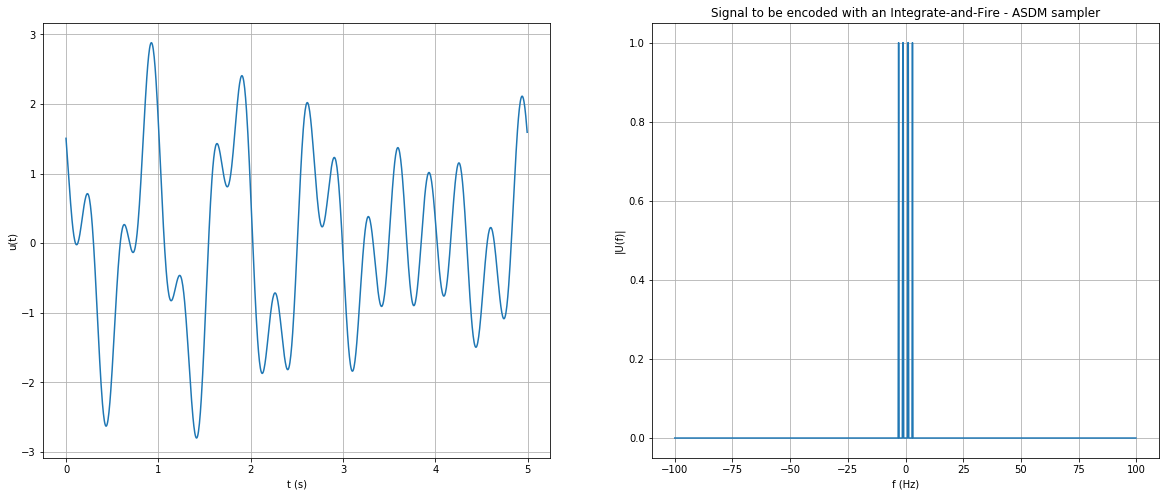

In [6]:
iaf_asdm.plotSignal()

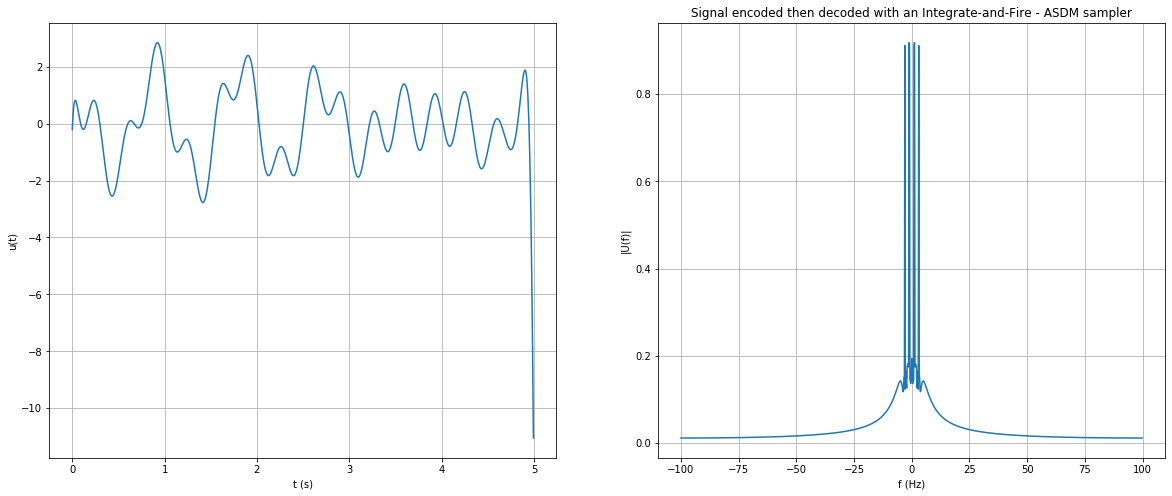

In [7]:
iaf_asdm.plotRecoveredSignal()

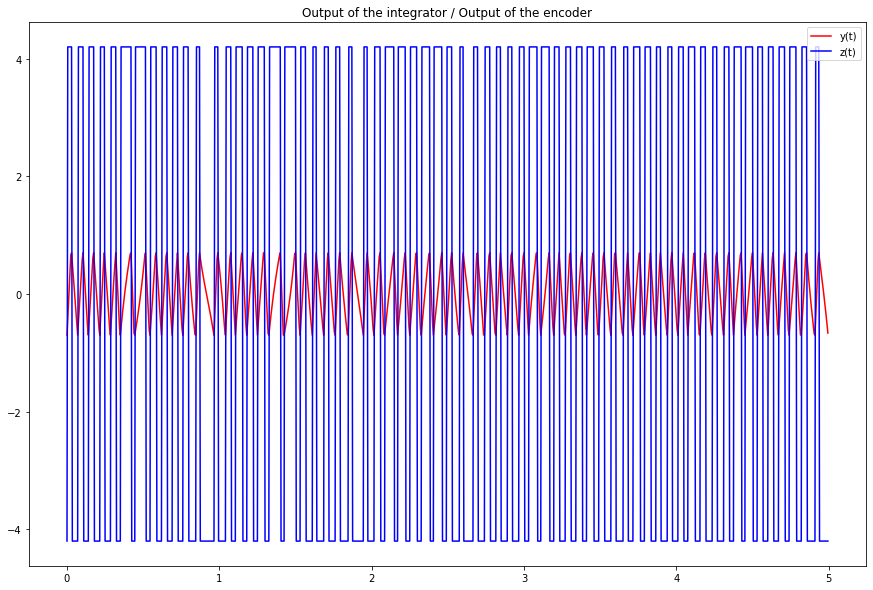

In [8]:
iaf_asdm.plotIntegralAndEncoderOutput()

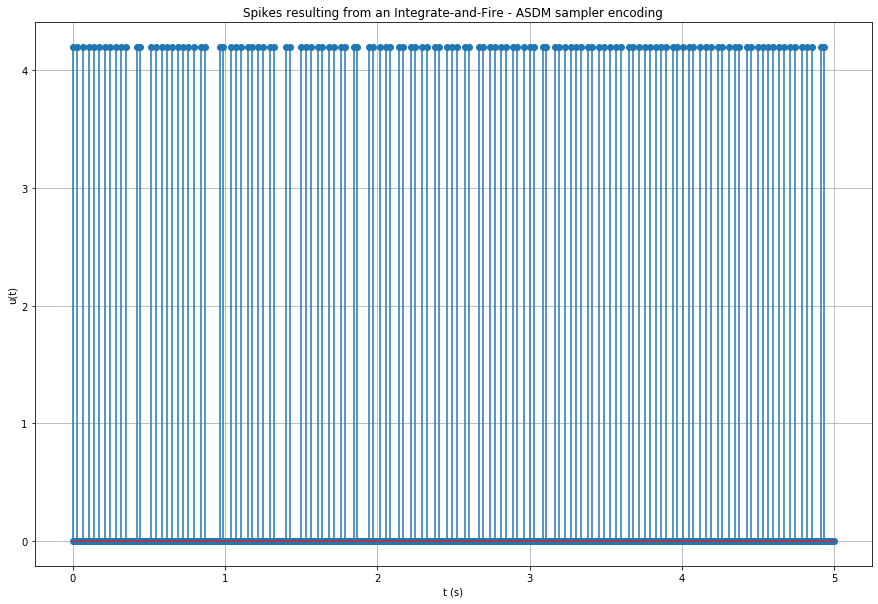

In [9]:
iaf_asdm.plotSpikes()

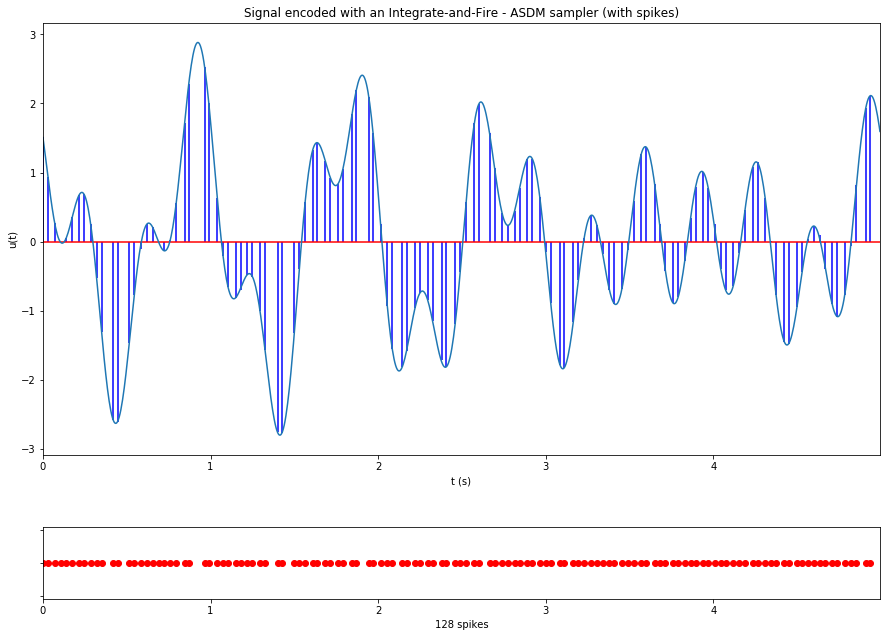

In [10]:
iaf_asdm.plotSignalAndSpikes()

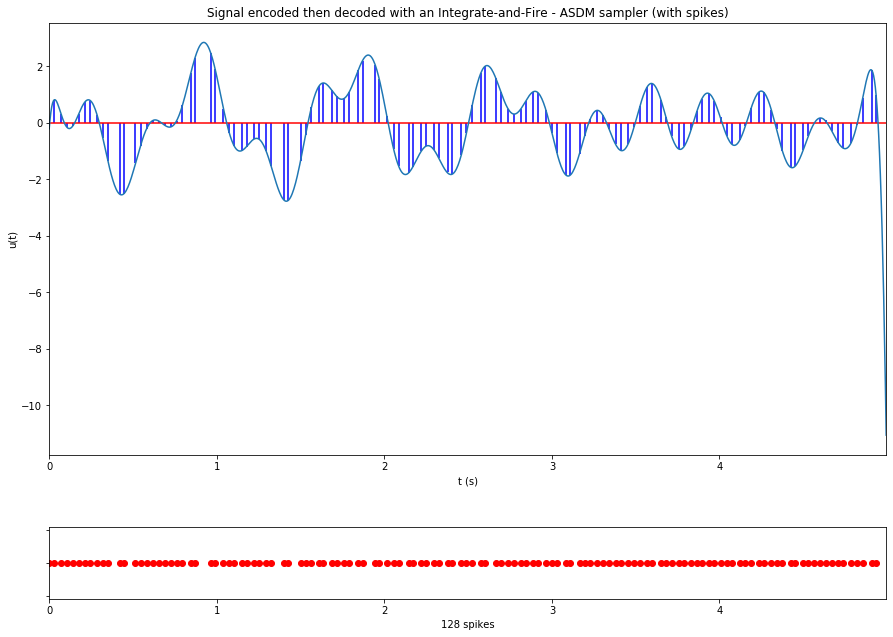

In [11]:
iaf_asdm.plotRecoveredSignalAndSpikes()

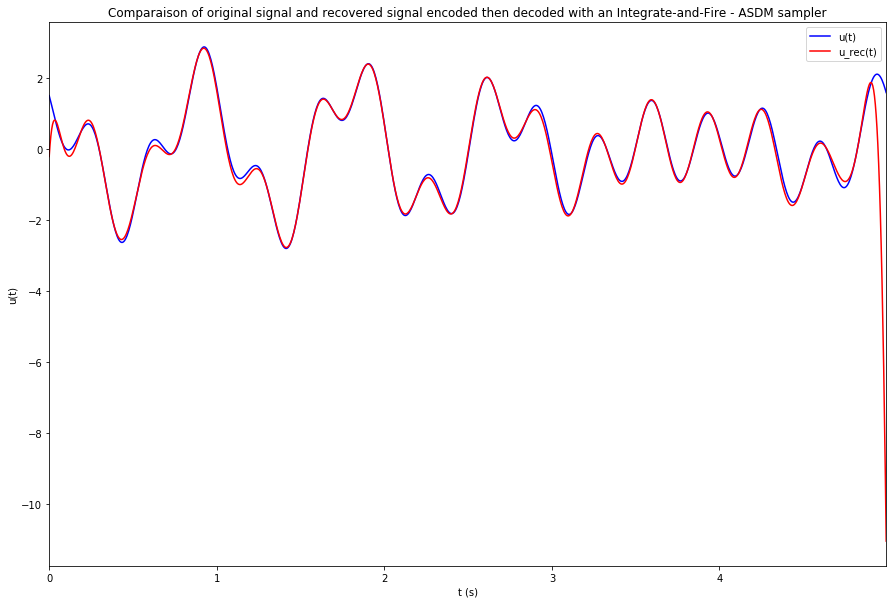

In [12]:
iaf_asdm.plotSignalAndRecoveredSignal()

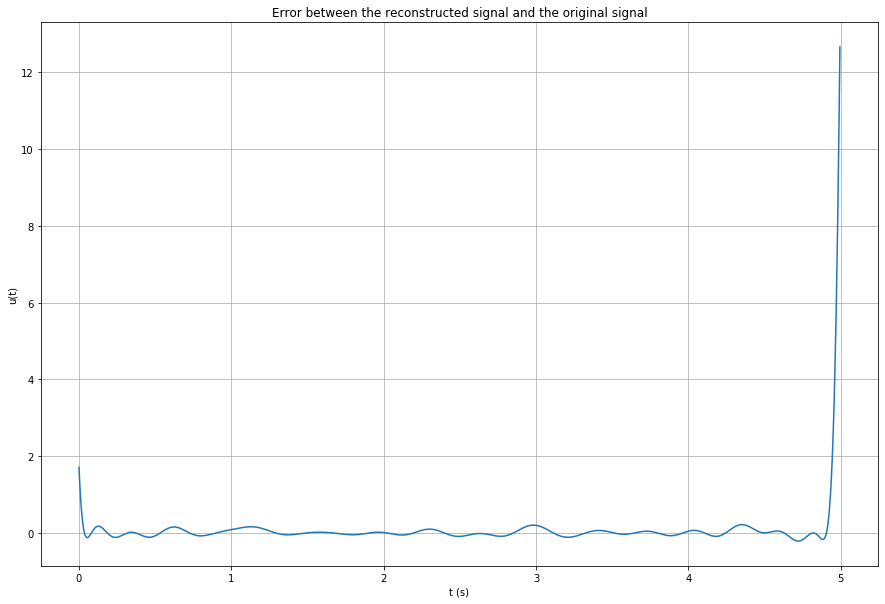

In [13]:
iaf_asdm.plotError()

In [14]:
print(f'The mean squared error of the signal is : {iaf_asdm.computeMeanSquaredError()}')

The mean squared error of the signal is : 582.6061277370459


# Experiments

In [15]:
import matplotlib.pyplot as plt

In [16]:
dur = 5
dt = 0.005
f_max = 3
bw = 2 * np.pi * f_max
N_c = 3

In [17]:
bl = BL(dur, dt, f_max, N_c)
t, u = bl.generate()
max_u = np.max(u)

In [18]:
bias = 4.2
threshold = 0.7
k_constant = 0.1

In [19]:
dx = 0.01
biases = [max_u+dx, max_u + 0.5, max_u +1.5, max_u + 3, max_u + 4.5, max_u + 6]
thresholds = [0.25, 0.37, 0.5, 0.62, 0.75, 0.9]
k_constants = [0.008, 0.04, 0.1, 0.15, 0.2, 0.25]

## Effect of $b$

In [20]:
iaf_asdm_1 = IAF_ASDM(biases[0], threshold, k_constant)
iaf_asdm_1.setSignal(t, u, dt, bw)
iaf_asdm_1.encode()
u_rec = iaf_asdm_1.decode()

In [21]:
iaf_asdm_2 = IAF_ASDM(biases[1], threshold, k_constant)
iaf_asdm_2.setSignal(t, u, dt, bw)
iaf_asdm_2.encode()
u_rec = iaf_asdm_2.decode()

In [22]:
iaf_asdm_3 = IAF_ASDM(biases[2], threshold, k_constant)
iaf_asdm_3.setSignal(t, u, dt, bw)
iaf_asdm_3.encode()
u_rec = iaf_asdm_3.decode()

In [23]:
iaf_asdm_4 = IAF_ASDM(biases[3], threshold, k_constant)
iaf_asdm_4.setSignal(t, u, dt, bw)
iaf_asdm_4.encode()
u_rec = iaf_asdm_4.decode()

In [24]:
iaf_asdm_5 = IAF_ASDM(biases[4], threshold, k_constant)
iaf_asdm_5.setSignal(t, u, dt, bw)
iaf_asdm_5.encode()
u_rec = iaf_asdm_5.decode()

In [25]:
iaf_asdm_6 = IAF_ASDM(biases[5], threshold, k_constant)
iaf_asdm_6.setSignal(t, u, dt, bw)
iaf_asdm_6.encode()
u_rec = iaf_asdm_6.decode()

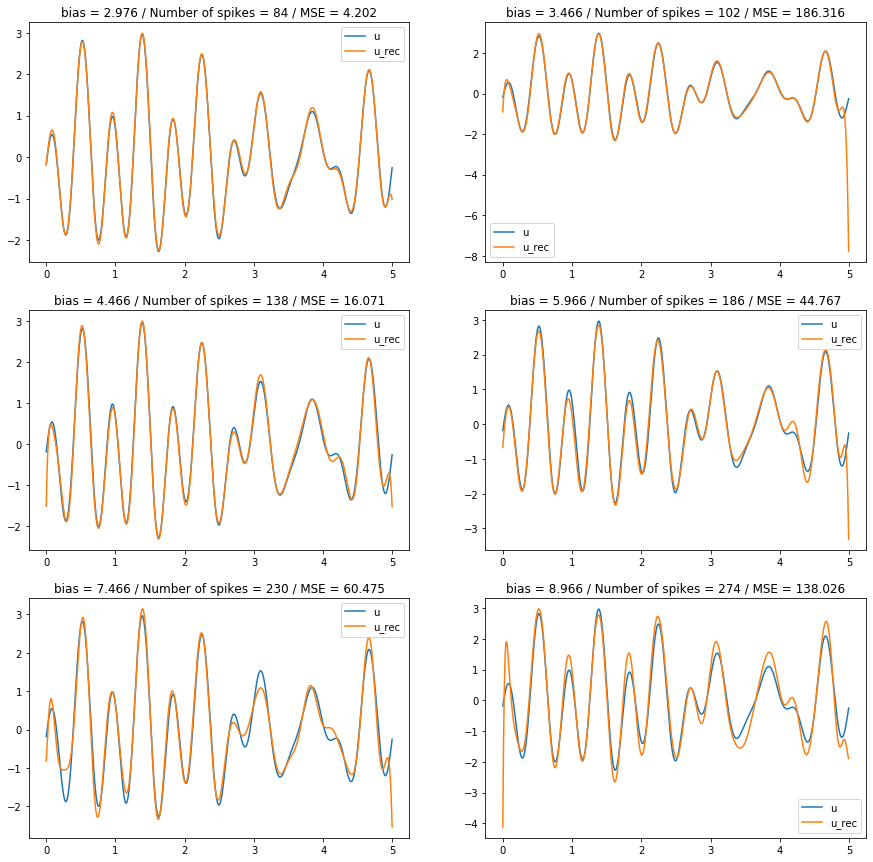

In [26]:
plt.figure(figsize = (15, 15))
plt.subplot(3,2,1)
plt.title(f'bias = {round(iaf_asdm_1.bias, 3)} / Number of spikes = {iaf_asdm_1.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_1.t, iaf_asdm_1.u , label = 'u')
plt.plot(iaf_asdm_1.t, iaf_asdm_1.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,2)
plt.title(f'bias = {round(iaf_asdm_2.bias, 3)} / Number of spikes = {iaf_asdm_2.getNumberOfSpikes()} / MSE = {round(iaf_asdm_2.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_2.t, iaf_asdm_2.u , label = 'u')
plt.plot(iaf_asdm_2.t, iaf_asdm_2.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,3)
plt.title(f'bias = {round(iaf_asdm_3.bias, 3)} / Number of spikes = {iaf_asdm_3.getNumberOfSpikes()} / MSE = {round(iaf_asdm_3.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_3.t, iaf_asdm_3.u , label = 'u')
plt.plot(iaf_asdm_3.t, iaf_asdm_3.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,4)
plt.title(f'bias = {round(iaf_asdm_4.bias, 3)} / Number of spikes = {iaf_asdm_4.getNumberOfSpikes()} / MSE = {round(iaf_asdm_4.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_4.t, iaf_asdm_4.u , label = 'u')
plt.plot(iaf_asdm_4.t, iaf_asdm_4.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,5)
plt.title(f'bias = {round(iaf_asdm_5.bias, 3)} / Number of spikes = {iaf_asdm_5.getNumberOfSpikes()} / MSE = {round(iaf_asdm_5.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_5.t, iaf_asdm_5.u , label = 'u')
plt.plot(iaf_asdm_5.t, iaf_asdm_5.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,6)
plt.title(f'bias = {round(iaf_asdm_6.bias, 3)} / Number of spikes = {iaf_asdm_6.getNumberOfSpikes()} / MSE = {round(iaf_asdm_6.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_6.t, iaf_asdm_6.u , label = 'u')
plt.plot(iaf_asdm_6.t, iaf_asdm_6.u_rec, label = 'u_rec')
plt.legend()

plt.savefig('saved_images/bias_variability.png')

In [27]:
mses_bias = [
    iaf_asdm_1.computeMeanSquaredError(),
    iaf_asdm_2.computeMeanSquaredError(),
    iaf_asdm_3.computeMeanSquaredError(),
    iaf_asdm_4.computeMeanSquaredError(),
    iaf_asdm_5.computeMeanSquaredError(),
    iaf_asdm_6.computeMeanSquaredError()
]

arg_bias = np.argmin(mses_bias)
best_bias = biases[arg_bias]

print(f'Best bias : {best_bias}')

Best bias : 2.9760630770049508


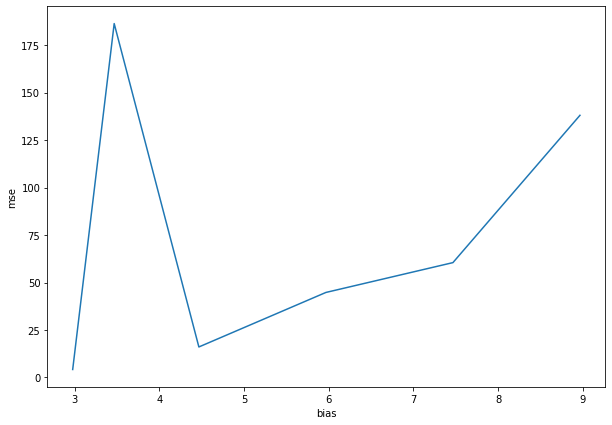

In [28]:
plt.figure(figsize=(10, 7))
plt.plot(biases, mses_bias)
plt.xlabel('bias')
plt.ylabel('mse')
plt.show()

## Effect of $\delta$

In [29]:
iaf_asdm_1_1 = IAF_ASDM(biases[arg_bias], thresholds[0], k_constant)
iaf_asdm_1_1.setSignal(t, u, dt, bw)
iaf_asdm_1_1.encode()
u_rec = iaf_asdm_1_1.decode()

In [30]:
iaf_asdm_1_2 = IAF_ASDM(biases[arg_bias], thresholds[1], k_constant)
iaf_asdm_1_2.setSignal(t, u, dt, bw)
iaf_asdm_1_2.encode()
u_rec = iaf_asdm_1_2.decode()

In [31]:
iaf_asdm_1_3 = IAF_ASDM(biases[arg_bias], thresholds[2], k_constant)
iaf_asdm_1_3.setSignal(t, u, dt, bw)
iaf_asdm_1_3.encode()
u_rec = iaf_asdm_1_3.decode()

In [32]:
iaf_asdm_1_4 = IAF_ASDM(biases[arg_bias], thresholds[3], k_constant)
iaf_asdm_1_4.setSignal(t, u, dt, bw)
iaf_asdm_1_4.encode()
u_rec = iaf_asdm_1_4.decode()

In [33]:
iaf_asdm_1_5 = IAF_ASDM(biases[arg_bias], thresholds[4], k_constant)
iaf_asdm_1_5.setSignal(t, u, dt, bw)
iaf_asdm_1_5.encode()
u_rec = iaf_asdm_1_5.decode()

In [34]:
iaf_asdm_1_6 = IAF_ASDM(biases[arg_bias], thresholds[5], k_constant)
iaf_asdm_1_6.setSignal(t, u, dt, bw)
iaf_asdm_1_6.encode()
u_rec = iaf_asdm_1_6.decode()

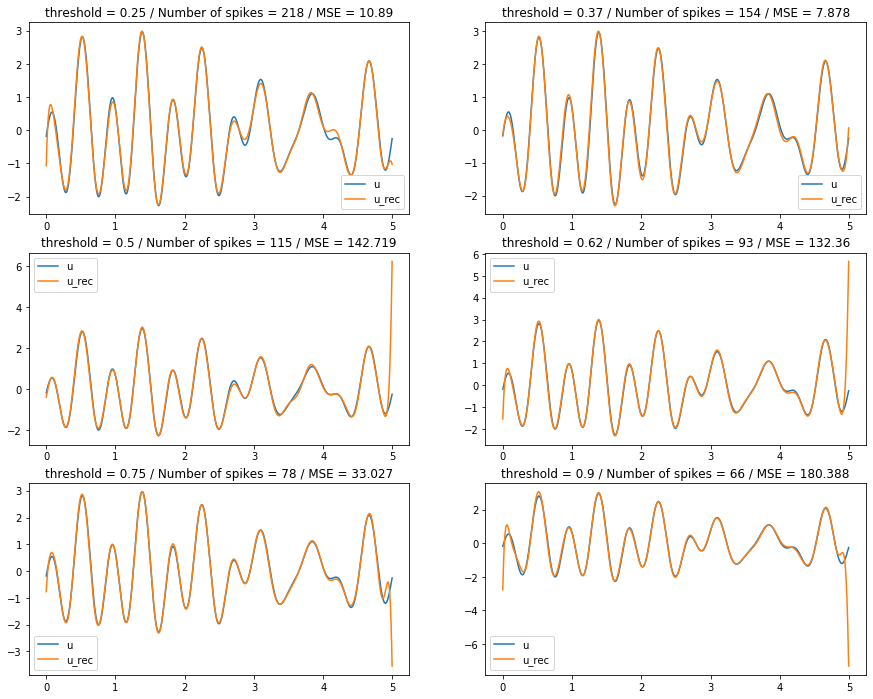

In [35]:
plt.figure(figsize = (15, 12))
plt.subplot(3,2,1)
plt.title(f'threshold = {round(iaf_asdm_1_1.threshold, 3)} / Number of spikes = {iaf_asdm_1_1.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_1.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_1_1.t, iaf_asdm_1_1.u , label = 'u')
plt.plot(iaf_asdm_1_1.t, iaf_asdm_1_1.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,2)
plt.title(f'threshold = {round(iaf_asdm_1_2.threshold, 3)} / Number of spikes = {iaf_asdm_1_2.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_2.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_1_2.t, iaf_asdm_1_2.u , label = 'u')
plt.plot(iaf_asdm_1_2.t, iaf_asdm_1_2.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,3)
plt.title(f'threshold = {round(iaf_asdm_1_3.threshold, 3)} / Number of spikes = {iaf_asdm_1_3.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_3.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_1_3.t, iaf_asdm_1_3.u , label = 'u')
plt.plot(iaf_asdm_1_3.t, iaf_asdm_1_3.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,4)
plt.title(f'threshold = {round(iaf_asdm_1_4.threshold, 3)} / Number of spikes = {iaf_asdm_1_4.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_4.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_1_4.t, iaf_asdm_1_4.u , label = 'u')
plt.plot(iaf_asdm_1_4.t, iaf_asdm_1_4.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,5)
plt.title(f'threshold = {round(iaf_asdm_1_5.threshold, 3)} / Number of spikes = {iaf_asdm_1_5.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_5.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_1_4.t, iaf_asdm_1_5.u , label = 'u')
plt.plot(iaf_asdm_1_4.t, iaf_asdm_1_5.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,6)
plt.title(f'threshold = {round(iaf_asdm_1_6.threshold, 3)} / Number of spikes = {iaf_asdm_1_6.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_6.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_1_4.t, iaf_asdm_1_6.u , label = 'u')
plt.plot(iaf_asdm_1_4.t, iaf_asdm_1_6.u_rec, label = 'u_rec')
plt.legend()

In [36]:
mses_thresh = [
    iaf_asdm_1_1.computeMeanSquaredError(),
    iaf_asdm_1_2.computeMeanSquaredError(),
    iaf_asdm_1_3.computeMeanSquaredError(),
    iaf_asdm_1_4.computeMeanSquaredError(),
    iaf_asdm_1_5.computeMeanSquaredError(),
    iaf_asdm_1_6.computeMeanSquaredError(),
]

arg_thresh = np.argmin(mses_thresh)
best_thresh = thresholds[arg_thresh]

print(f'Best threshold : {best_thresh}')

Best threshold : 0.37


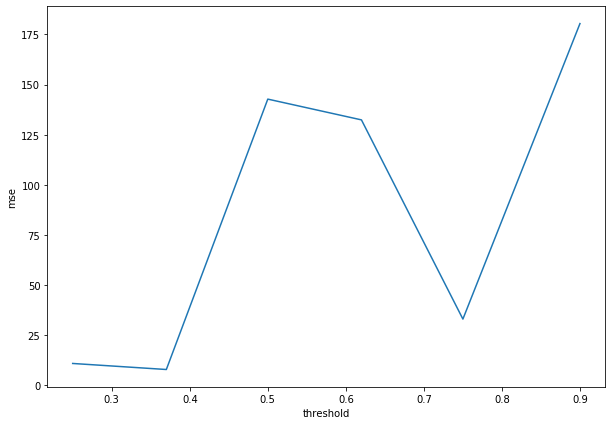

In [37]:
plt.figure(figsize=(10, 7))
plt.plot(thresholds, mses_thresh)
plt.xlabel('threshold')
plt.ylabel('mse')
plt.show()

## Effect of $\kappa$

In [38]:
iaf_asdm_1_1_1 = IAF_ASDM(biases[arg_bias], thresholds[arg_thresh], k_constants[0])
iaf_asdm_1_1_1.setSignal(t, u, dt, bw)
iaf_asdm_1_1_1.encode()
u_rec = iaf_asdm_1_1_1.decode()

In [39]:
iaf_asdm_1_1_2 = IAF_ASDM(biases[arg_bias], thresholds[arg_thresh], k_constants[1])
iaf_asdm_1_1_2.setSignal(t, u, dt, bw)
iaf_asdm_1_1_2.encode()
u_rec = iaf_asdm_1_1_2.decode()

In [40]:
iaf_asdm_1_1_3 = IAF_ASDM(biases[arg_bias], thresholds[arg_thresh], k_constants[2])
iaf_asdm_1_1_3.setSignal(t, u, dt, bw)
iaf_asdm_1_1_3.encode()
u_rec = iaf_asdm_1_1_3.decode()

In [41]:
iaf_asdm_1_1_4 = IAF_ASDM(biases[arg_bias], thresholds[arg_thresh], k_constants[3])
iaf_asdm_1_1_4.setSignal(t, u, dt, bw)
iaf_asdm_1_1_4.encode()
u_rec = iaf_asdm_1_1_4.decode()

In [42]:
iaf_asdm_1_1_5 = IAF_ASDM(biases[arg_bias], thresholds[arg_thresh], k_constants[4])
iaf_asdm_1_1_5.setSignal(t, u, dt, bw)
iaf_asdm_1_1_5.encode()
u_rec = iaf_asdm_1_1_5.decode()

In [43]:
iaf_asdm_1_1_6 = IAF_ASDM(biases[arg_bias], thresholds[arg_thresh], k_constants[5])
iaf_asdm_1_1_6.setSignal(t, u, dt, bw)
iaf_asdm_1_1_6.encode()
u_rec = iaf_asdm_1_1_6.decode()

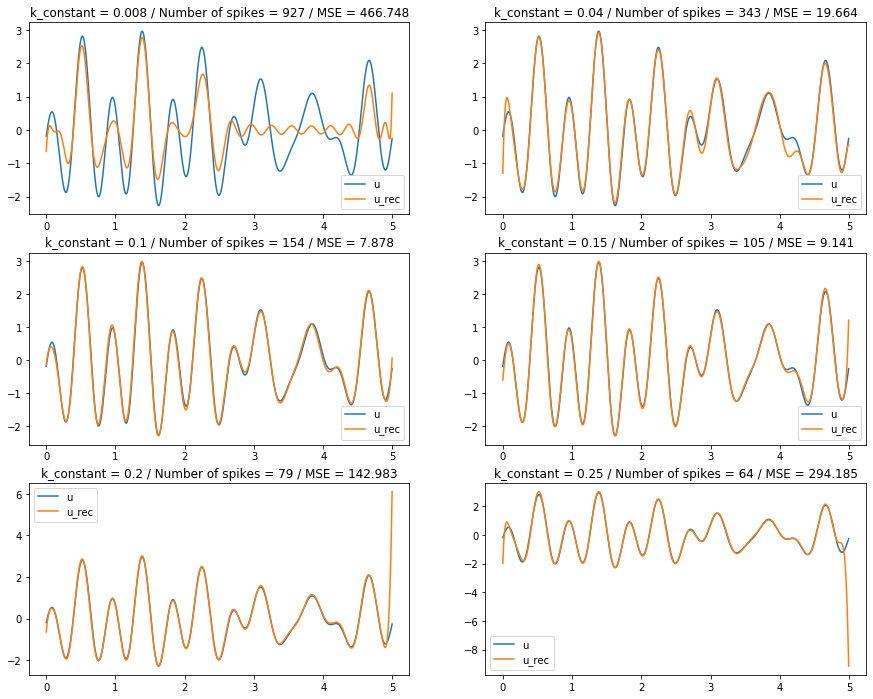

In [44]:
plt.figure(figsize = (15, 12))
plt.subplot(3,2,1)
plt.title(f'k_constant = {round(iaf_asdm_1_1_1.k_constant, 3)} / Number of spikes = {iaf_asdm_1_1_1.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_1_1.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_1_1_1.t, iaf_asdm_1_1_1.u , label = 'u')
plt.plot(iaf_asdm_1_1_1.t, iaf_asdm_1_1_1.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,2)
plt.title(f'k_constant = {round(iaf_asdm_1_1_2.k_constant, 3)} / Number of spikes = {iaf_asdm_1_1_2.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_1_2.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_1_1_2.t, iaf_asdm_1_1_2.u , label = 'u')
plt.plot(iaf_asdm_1_1_2.t, iaf_asdm_1_1_2.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,3)
plt.title(f'k_constant = {round(iaf_asdm_1_1_3.k_constant, 3)} / Number of spikes = {iaf_asdm_1_1_3.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_1_3.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_1_1_3.t, iaf_asdm_1_1_3.u , label = 'u')
plt.plot(iaf_asdm_1_1_3.t, iaf_asdm_1_1_3.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,4)
plt.title(f'k_constant = {round(iaf_asdm_1_1_4.k_constant, 3)} / Number of spikes = {iaf_asdm_1_1_4.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_1_4.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_1_1_4.t, iaf_asdm_1_1_4.u , label = 'u')
plt.plot(iaf_asdm_1_1_4.t, iaf_asdm_1_1_4.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,5)
plt.title(f'k_constant = {round(iaf_asdm_1_1_5.k_constant, 3)} / Number of spikes = {iaf_asdm_1_1_5.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_1_5.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_1_1_5.t, iaf_asdm_1_1_5.u , label = 'u')
plt.plot(iaf_asdm_1_1_5.t, iaf_asdm_1_1_5.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,6)
plt.title(f'k_constant = {round(iaf_asdm_1_1_6.k_constant, 3)} / Number of spikes = {iaf_asdm_1_1_6.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_1_6.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_1_1_6.t, iaf_asdm_1_1_6.u , label = 'u')
plt.plot(iaf_asdm_1_1_6.t, iaf_asdm_1_1_6.u_rec, label = 'u_rec')
plt.legend()

In [45]:
mses_k = [
    iaf_asdm_1_1_1.computeMeanSquaredError(),
    iaf_asdm_1_1_2.computeMeanSquaredError(),
    iaf_asdm_1_1_3.computeMeanSquaredError(),
    iaf_asdm_1_1_4.computeMeanSquaredError(),
    iaf_asdm_1_1_5.computeMeanSquaredError(),
    iaf_asdm_1_1_6.computeMeanSquaredError(),
]

arg_k = np.argmin(mses_k)
best_k = k_constants[arg_k]

print(f'Best k_constant : {best_k}')

Best k_constant : 0.1


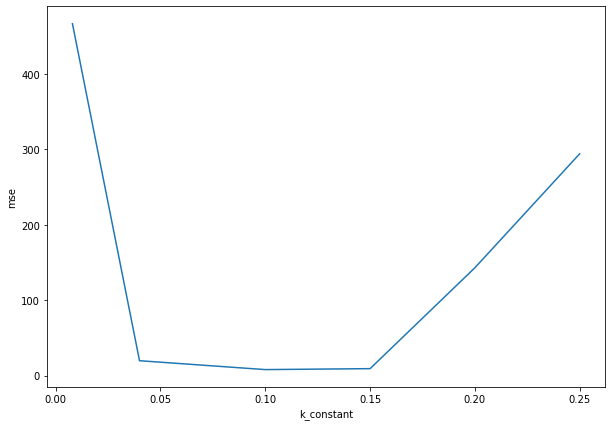

In [46]:
plt.figure(figsize=(10, 7))
plt.plot(k_constants, mses_k)
plt.xlabel('k_constant')
plt.ylabel('mse')
plt.show()

## Result

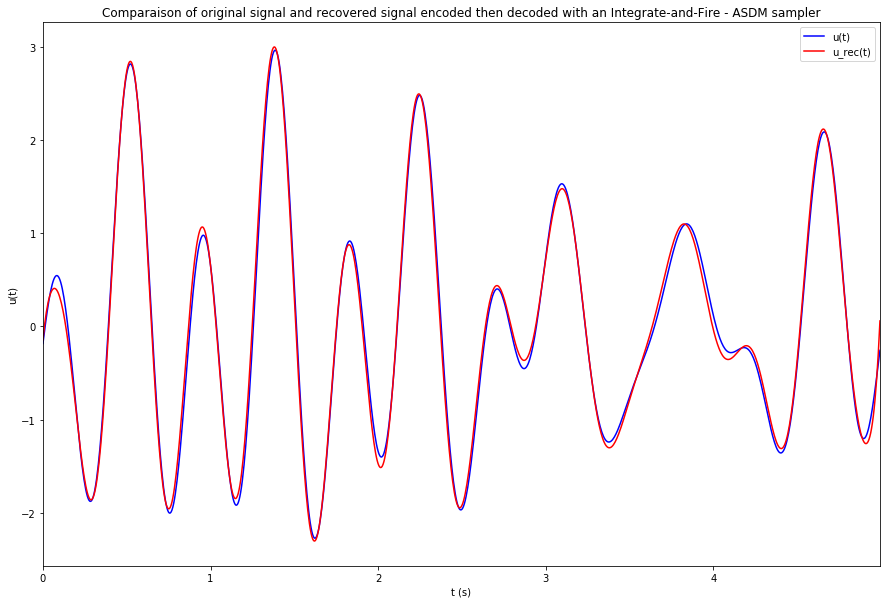

In [47]:
iaf_asdm_best = IAF_ASDM(biases[arg_bias], thresholds[arg_thresh], k_constants[arg_k])
iaf_asdm_best.setSignal(t, u, dt, bw)
iaf_asdm_best.encode()
iaf_asdm_best.decode()

iaf_asdm_best.plotSignalAndRecoveredSignal()

In [48]:
print(f'Best parameters are :')
print(f'b : {iaf_asdm_best.bias}')
print(f'threshold : {iaf_asdm_best.threshold}')
print(f'k_constant : {iaf_asdm_best.threshold}')
print(f'For a MSE of : {iaf_asdm_best.computeMeanSquaredError()}')
print(f'Number of spikes : {iaf_asdm_best.getNumberOfSpikes()}')

Best parameters are :
b : 2.9760630770049508
threshold : 0.37
k_constant : 0.37
For a MSE of : 7.877668403491854
Number of spikes : 154


## GridSearch :

In [49]:
mses = np.ones((6, 6, 6)) * np.inf

for idx_b, bias in enumerate(biases):
    for idx_t, threshold in enumerate(thresholds):
        for idx_k, k_constant in enumerate(k_constants):
            iaf_asdm = IAF_ASDM(bias, threshold, k_constant)
            iaf_asdm.setSignal(t, u, dt, bw)
            iaf_asdm.encode()
            try:
                iaf_asdm.decode()
                mses[idx_b, idx_t, idx_k] = iaf_asdm.computeMeanSquaredError()
            except:
                print('ERROR')
                continue

In [50]:
unrav_idx = np.unravel_index(np.argmin(mses), (6, 6, 6))

## Result

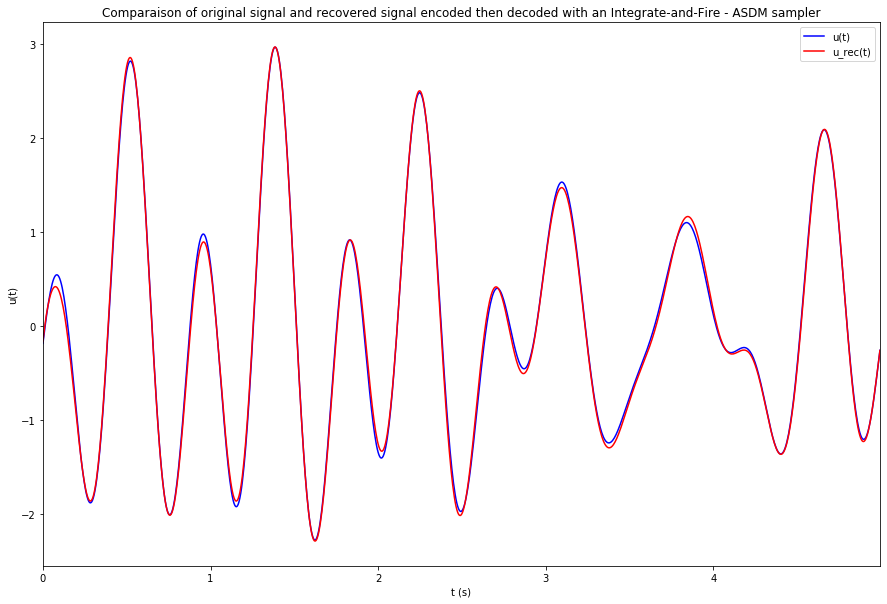

In [51]:
iaf_asdm_best = IAF_ASDM(biases[unrav_idx[0]], thresholds[unrav_idx[1]], k_constants[unrav_idx[2]])
iaf_asdm_best.setSignal(t, u, dt, bw)
iaf_asdm_best.encode()
iaf_asdm_best.decode()

iaf_asdm_best.plotSignalAndRecoveredSignal()

plt.savefig('saved_images/perfect_reconstruction.png')

In [52]:
print(f'Best parameters are :')
print(f'b : {iaf_asdm_best.bias}')
print(f'threshold : {iaf_asdm_best.threshold}')
print(f'k_constant : {iaf_asdm_best.k_constant}')
print(f'For a MSE of : {iaf_asdm_best.computeMeanSquaredError()}')
print(f'Number of spikes : {iaf_asdm_best.getNumberOfSpikes()}')

Best parameters are :
b : 2.9760630770049508
threshold : 0.9
k_constant : 0.04
For a MSE of : 2.3724213687331597
Number of spikes : 157


## Effect of noise

In [53]:
from scipy.signal import firwin, lfilter
from numpy.random import normal
import plots

In [54]:
bias = iaf_asdm_best.bias
threshold = iaf_asdm_best.threshold
k_constant = iaf_asdm_best.k_constant

In [55]:
def addNoise(u, var):
    noise = normal(0, var, u.shape)
    new_signal = u + noise
    
    return new_signal

In [56]:
noises = np.linspace(0, 3, 30, endpoint=True)

In [57]:
mses_noises = np.ones(noises.shape) * np.inf

for idx_n, noise in enumerate(noises):
    iaf_asdm = IAF_ASDM(bias, threshold, k_constant)
    iaf_asdm.setSignal(t, u, dt, bw, varNoise = noise)
    iaf_asdm.encode()
    iaf_asdm.decode()
    
    mses_noises[idx_n] = iaf_asdm.computeMeanSquaredError()

In [58]:
mses_noises

array([  2.37242137,   2.62844325,  11.02811387,  12.15371952,
        23.65579612,  22.00760602,  35.5486356 ,  37.3375458 ,
        31.19057406, 127.4413973 ,  85.33995953,  79.25784087,
       249.83277258, 133.35266542, 126.243243  , 374.98253679,
       207.59015952, 394.22899321, 214.37301883, 327.04465267,
       403.43249249, 255.67587438, 487.07916699, 334.454883  ,
       391.68657684, 602.39274593, 764.06353779, 614.1917962 ,
       640.59967852, 809.06050081])

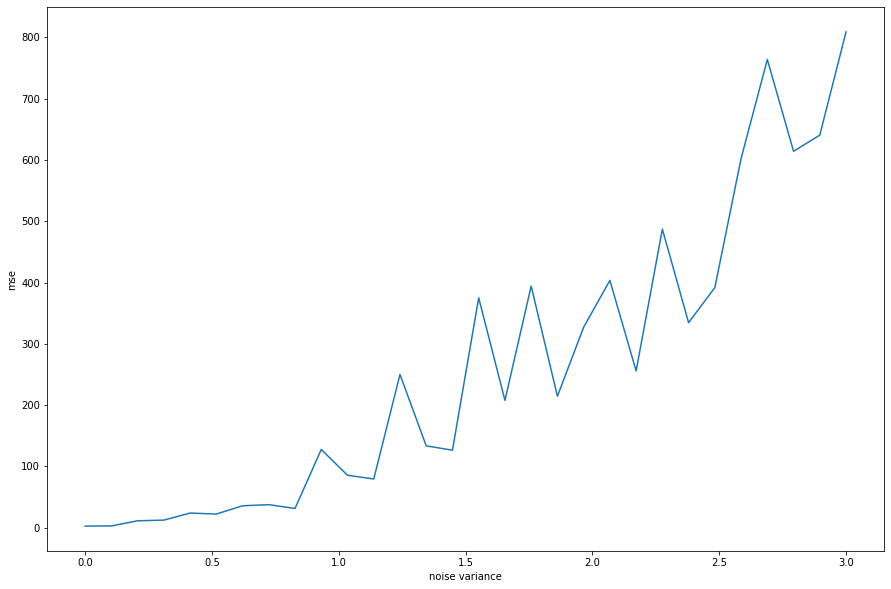

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(15, 10))
plt.plot(noises, mses_noises)
plt.xlabel('noise variance')
plt.ylabel('mse')
plt.show()

plt.savefig('saved_images/mse_per_noise.png')

In [60]:
iaf_asdm_n_4 = IAF_ASDM(bias, threshold, k_constant)
iaf_asdm_n_4.setSignal(t, u, dt, bw, varNoise = noises[4])
iaf_asdm_n_4.encode()
iaf_asdm_n_4.decode()

array([-4.49109586e-01, -2.52801087e-01, -8.84539751e-02,  4.74861024e-02,
        1.58312428e-01,  2.47056568e-01,  3.16490066e-01,  3.69128305e-01,
        4.07236387e-01,  4.32836826e-01,  4.47718885e-01,  4.53449369e-01,
        4.51384667e-01,  4.42683859e-01,  4.28322699e-01,  4.09108273e-01,
        3.85694163e-01,  3.58595911e-01,  3.28206640e-01,  2.94812644e-01,
        2.58608799e-01,  2.19713652e-01,  1.78184045e-01,  1.34029163e-01,
        8.72238767e-02,  3.77212985e-02, -1.45355383e-02, -6.96029564e-02,
       -1.27526919e-01, -1.88334371e-01, -2.52025665e-01, -3.18568105e-01,
       -3.87890596e-01, -4.59879418e-01, -5.34375089e-01, -6.11170308e-01,
       -6.90008928e-01, -7.70585932e-01, -8.52548338e-01, -9.35496996e-01,
       -1.01898919e+00, -1.10254199e+00, -1.18563626e+00, -1.26772129e+00,
       -1.34821986e+00, -1.42653379e+00, -1.50204982e+00, -1.57414569e+00,
       -1.64219647e+00, -1.70558088e+00, -1.76368769e+00, -1.81592201e+00,
       -1.86171147e+00, -

In [61]:
iaf_asdm_n_8 = IAF_ASDM(bias, threshold, k_constant)
iaf_asdm_n_8.setSignal(t, u, dt, bw, varNoise = noises[8])
iaf_asdm_n_8.encode()
iaf_asdm_n_8.decode()

array([-4.23946656e-01, -3.13436478e-01, -2.06964616e-01, -1.05658584e-01,
       -1.04549643e-02,  7.78883396e-02,  1.58779324e-01,  2.31778742e-01,
        2.96586759e-01,  3.53029546e-01,  4.01045950e-01,  4.40674379e-01,
        4.72040013e-01,  4.95342448e-01,  5.10843883e-01,  5.18857914e-01,
        5.19739029e-01,  5.13872852e-01,  5.01667192e-01,  4.83543924e-01,
        4.59931741e-01,  4.31259782e-01,  3.97952135e-01,  3.60423221e-01,
        3.19074024e-01,  2.74289154e-01,  2.26434699e-01,  1.75856833e-01,
        1.22881115e-01,  6.78124366e-02,  1.09355577e-02, -4.74838474e-02,
       -1.07197685e-01, -1.67973557e-01, -2.29592569e-01, -2.91846892e-01,
       -3.54537159e-01, -4.17469767e-01, -4.80454140e-01, -5.43300026e-01,
       -6.05814897e-01, -6.67801488e-01, -7.29055546e-01, -7.89363830e-01,
       -8.48502403e-01, -9.06235247e-01, -9.62313240e-01, -1.01647352e+00,
       -1.06843921e+00, -1.11791965e+00, -1.16461088e+00, -1.20819669e+00,
       -1.24834999e+00, -

In [62]:
iaf_asdm_n_10 = IAF_ASDM(bias, threshold, k_constant)
iaf_asdm_n_10.setSignal(t, u, dt, bw, varNoise = noises[10])
iaf_asdm_n_10.encode()
iaf_asdm_n_10.decode()

array([-1.61113862e-01, -1.05398081e-01, -4.99812499e-02,  5.74064841e-03,
        6.21348975e-02,  1.19352750e-01,  1.77350925e-01,  2.35913654e-01,
        2.94675039e-01,  3.53141493e-01,  4.10714038e-01,  4.66710259e-01,
        5.20385723e-01,  5.70954668e-01,  6.17609809e-01,  6.59541108e-01,
        6.95953369e-01,  7.26082554e-01,  7.49210704e-01,  7.64679403e-01,
        7.71901708e-01,  7.70372503e-01,  7.59677245e-01,  7.39499098e-01,
        7.09624451e-01,  6.69946837e-01,  6.20469294e-01,  5.61305213e-01,
        4.92677725e-01,  4.14917709e-01,  3.28460498e-01,  2.33841374e-01,
        1.31689944e-01,  2.27235237e-02, -9.22603927e-02, -2.12392427e-01,
       -3.36740282e-01, -4.64318249e-01, -5.94097134e-01, -7.25014487e-01,
       -8.55985018e-01, -9.85911081e-01, -1.11369312e+00, -1.23823994e+00,
       -1.35847880e+00, -1.47336506e+00, -1.58189150e+00, -1.68309701e+00,
       -1.77607486e+00, -1.85998014e+00, -1.93403663e+00, -1.99754286e+00,
       -2.04987741e+00, -

In [63]:
iaf_asdm_n_13 = IAF_ASDM(bias, threshold, k_constant)
iaf_asdm_n_13.setSignal(t, u, dt, bw, varNoise = noises[13])
iaf_asdm_n_13.encode()
iaf_asdm_n_13.decode()

array([ 1.39105417,  0.95316645,  0.60475155,  0.33659684,  0.13969906,
        0.00532025, -0.07496164, -0.1092078 , -0.10507918, -0.06980275,
       -0.01014349,  0.06761816,  0.15770329,  0.25484627,  0.35430137,
        0.45184442,  0.54376991,  0.62688373,  0.69849173,  0.75638478,
        0.79882021,  0.82450041,  0.83254865,  0.8224827 ,  0.79418646,
        0.74788008,  0.68408891,  0.60361159,  0.50748772,  0.39696531,
        0.2734685 ,  0.13856568, -0.00606161, -0.15864878, -0.31737698,
       -0.48040057, -0.64587281, -0.81196983, -0.97691267, -1.13898725,
       -1.29656225, -1.44810484, -1.59219412, -1.72753251, -1.85295476,
       -1.96743499, -2.07009154, -2.16018978, -2.23714313, -2.30051213,
       -2.35000191, -2.38545807, -2.40686119, -2.41432005, -2.40806374,
       -2.38843292, -2.35587015, -2.31090979, -2.25416726, -2.18632815,
       -2.10813714, -2.02038685, -1.92390691, -1.81955328, -1.70819792,
       -1.59071894, -1.46799141, -1.34087874, -1.21022485, -1.07

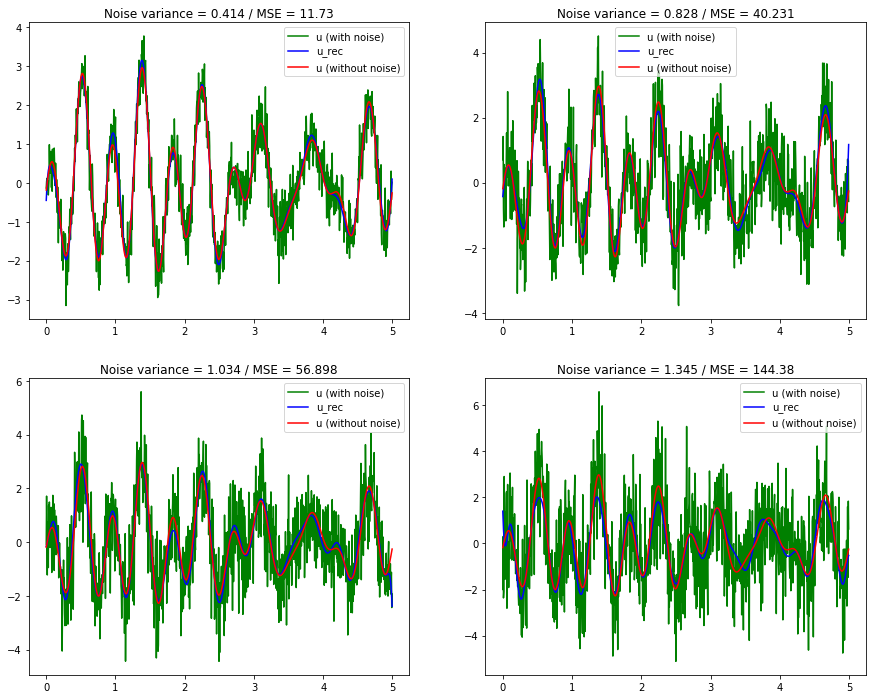

In [64]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'Noise variance = {round(noises[4], 3)} / MSE = {round(iaf_asdm_n_4.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_n_4.t, iaf_asdm_n_4.u , 'g', label = 'u (with noise)')
plt.plot(iaf_asdm_n_4.t, iaf_asdm_n_4.u_rec, 'b', label = 'u_rec')
plt.plot(iaf_asdm_n_4.t, iaf_asdm_n_4.original, 'r',  label ='u (without noise)')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'Noise variance = {round(noises[8], 3)} / MSE = {round(iaf_asdm_n_8.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_n_8.t, iaf_asdm_n_8.u , 'g', label = 'u (with noise)')
plt.plot(iaf_asdm_n_8.t, iaf_asdm_n_8.u_rec, 'b', label = 'u_rec')
plt.plot(iaf_asdm_n_8.t, iaf_asdm_n_8.original, 'r', label ='u (without noise)')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'Noise variance = {round(noises[10], 3)} / MSE = {round(iaf_asdm_n_10.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_n_10.t, iaf_asdm_n_10.u , 'g', label = 'u (with noise)')
plt.plot(iaf_asdm_n_10.t, iaf_asdm_n_10.u_rec, 'b', label = 'u_rec')
plt.plot(iaf_asdm_n_10.t, iaf_asdm_n_10.original, 'r', label ='u (without noise)')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'Noise variance = {round(noises[13], 3)} / MSE = {round(iaf_asdm_n_13.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_n_13.t, iaf_asdm_n_13.u , 'g', label = 'u (with noise)')
plt.plot(iaf_asdm_n_13.t, iaf_asdm_n_13.u_rec, 'b', label = 'u_rec')
plt.plot(iaf_asdm_n_13.t, iaf_asdm_n_13.original, 'r', label ='u (without noise)')
plt.legend()

plt.savefig('saved_images/reconstruction_with_noise.png')